# Pokemon Trainers of Western PA. This is your guide to finding pokemon in and around the city of Pittsburgh.

Pokemon Trainers have come together to show new, or new to the area, Pokemon trainers where they can find Grass, Water, and Fire type Pokemon.  

In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

# Grass type Pokemon

In [4]:
parks_df = pd.read_csv("City Parks.csv")

Below is a list of the top 5 and bottom 5 neighborhoods to find grass type Pokemon

In [5]:
parks_count = parks_df.groupby("neighborhood")['name'].count().reset_index()
parks_count.columns = ['Neighborhood', 'Number of Parks']
parks_count = parks_count.sort_values(by='Number of Parks', ascending=False)
print(parks_count)

                 Neighborhood  Number of Parks
22               East Liberty               12
13  Central Business District               10
5                   Beechview                8
57          South Side Slopes                7
50               Point Breeze                7
..                        ...              ...
9                     Bon Air                1
14      Central Lawrenceville                1
60        Squirrel Hill North                1
62            Stanton Heights                1
72                    Windgap                1

[73 rows x 2 columns]


<Axes: >

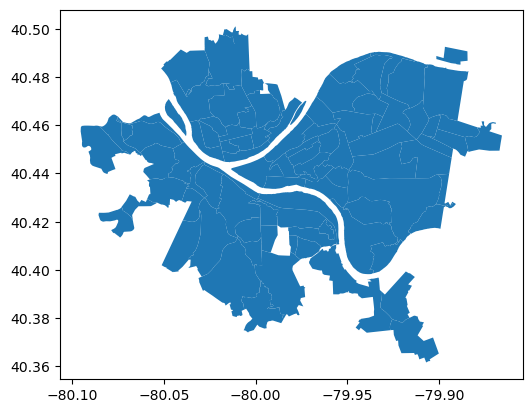

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

In [7]:
parks_map = neighborhoods.merge(parks_count, how='left', left_on='hood', right_on='Neighborhood')
parks_map[['hood','Number of Parks','geometry']].head()

,hood,Number of Parks,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


Below is a map of Pittsburgh showing on a green coloured scale where the most Grass type Pokemon should be found 

<Axes: >

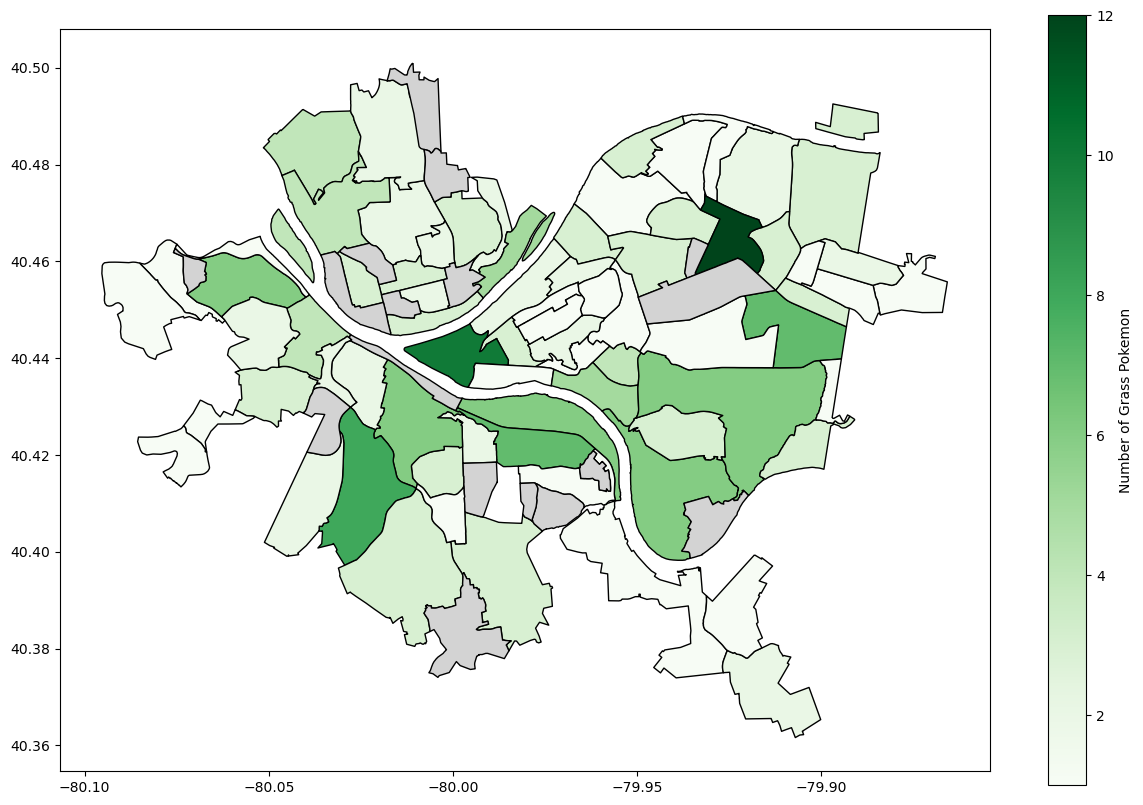

In [8]:
parks_map.plot(column='Number of Parks', 
               cmap='Greens',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Grass Pokemon"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

# Water Type Pokemon

Water Type Pokemon are found anywhere water is. Pittsburgh is also known as "The city of bridges" because of all the bridges mostly over our rivers. We were able to take use public water features as our base metric, and then addded +20 to the metric for all neighborhoods that border on the the 3 rivers 

In [9]:
waterfeatures_df = pd.read_csv("Pittsburgh Water Features.csv")

In [12]:
WF_count = waterfeatures_df.groupby("neighborhood")['name'].count().reset_index()
WF_count.columns = ['Neighborhood', 'Water Features']
WF_count = WF_count.sort_values(by='Water Features', ascending=False)
print(WF_count)

           Neighborhood  Water Features
55  Squirrel Hill South              14
26        Highland Park              12
10            Brookline               8
6            Bloomfield               8
59      Terrace Village               8
..                  ...             ...
40              Oakwood               1
28        Homewood West               1
21             Fineview               1
14    Central Northside               1
52        Spring Garden               1

[66 rows x 2 columns]


In [13]:
neighborhoods_to_update = [ "Lincoln-Lemington-Belmar", "Highland Park", "Morningside", "Upper Lawrenceville",
"Central Lawrenceville", "Lower Lawrenceville", "Herrs Island", "Strip District",
"Central Business District", "Troy Hill", "North Shore", "Chateau", "Marshall-Shadeland","Brighton Height",
"Brunot Island", "Esplen", "Elliott", "South Shore", "South Side Flats",
"Hays", "Bluff", "South Oakland", "Hazelwood", "Squirrel Hill South", "Glen Hazel", "Swisshelm Park"]
 
for hood in neighborhoods_to_update:
    if hood in WF_count['Neighborhood'].values:
        WF_count.loc[WF_count['Neighborhood'] == hood, 'Water Features'] += 20
    else:
        WF_count = pd.concat([WF_count, pd.DataFrame({'Neighborhood': [hood], 'Water Features': [20]})])

WF_count = WF_count.sort_values(by='Water Features', ascending=False).reset_index(drop=True)

print(WF_count)

           Neighborhood  Water Features
0   Squirrel Hill South              34
1         Highland Park              32
2             Troy Hill              26
3               Elliott              26
4      South Side Flats              25
..                  ...             ...
69              Oakwood               1
70        Homewood West               1
71             Fineview               1
72    Central Northside               1
73        Spring Garden               1

[74 rows x 2 columns]


In [14]:
WF_map = neighborhoods.merge(WF_count, how='left', left_on='hood', right_on='Neighborhood')
WF_map[['hood','Water Features','geometry']].head()

,hood,Water Features,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,3.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,21.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

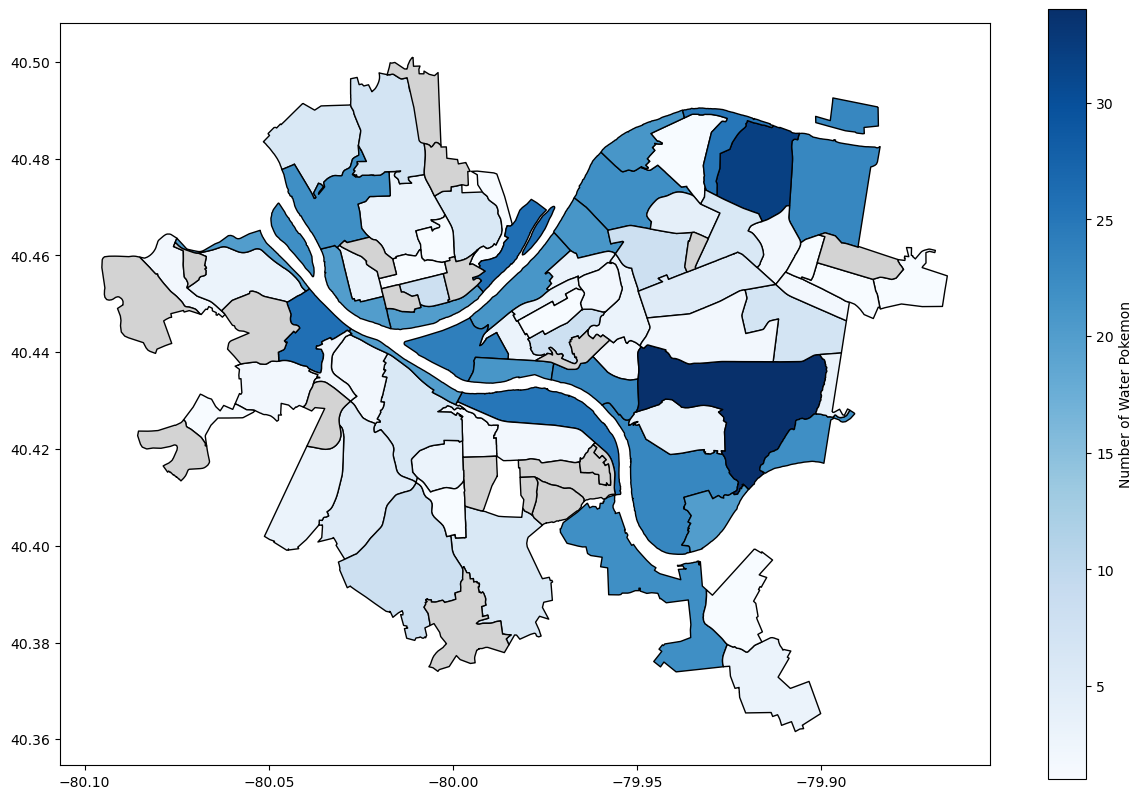

In [15]:
WF_map.plot(column='Water Features', 
               cmap='Blues',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Water Pokemon"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

# Fire type Pokemon 

Fire Type Pokémon are natively found around volcanos, but they can be found in most urban areas as well. 

# Where to catch them all! 

So now that we have isolated type by neighborhood, lets bring all these together to give us a Blue, Green, and Red map of the Pittsburgh Neighborhoods